# **The Part below is to see the model's performance and prediction for unseen images with rings.**
( Make Sure to keep the result of the model in zip format in pc and run below code after reconnecting)

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from google.colab import files
import zipfile, os

print("🔼 Upload your YOLO ZIP file (must include best.pt):")
model_zip = files.upload()
model_folder = "/content/yolo_result"

with zipfile.ZipFile(list(model_zip.keys())[0], 'r') as zip_ref:
    zip_ref.extractall(model_folder)

from ultralytics import YOLO

model_path = None
for root, dirs, filenames in os.walk(model_folder):
    for file in filenames:
        if file == "best.pt":
            model_path = os.path.join(root, file)
            break

assert model_path is not None, "❌ best.pt not found!"
print(f"✅ Model loaded from: {model_path}")
model = YOLO(model_path)



🔼 Upload your YOLO ZIP file (must include best.pt):


Saving ring_yolo_project.zip to ring_yolo_project.zip
✅ Model loaded from: /content/yolo_result/content/ring_yolo_project/yolov8_ring_model/weights/best.pt


🔼 Upload a single image to test:


Saving 360_F_520599188_JPOHZL5hOBeHI9YM5WGQOzazS2Vyitzu.jpg to 360_F_520599188_JPOHZL5hOBeHI9YM5WGQOzazS2Vyitzu.jpg

image 1/1 /content/360_F_520599188_JPOHZL5hOBeHI9YM5WGQOzazS2Vyitzu.jpg: 448x640 2 Rings, 293.0ms
Speed: 7.2ms preprocess, 293.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
🖼️ Prediction result:


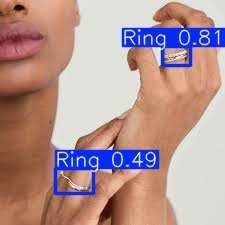

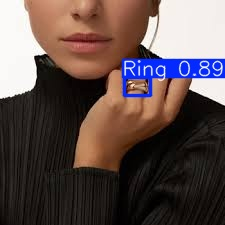

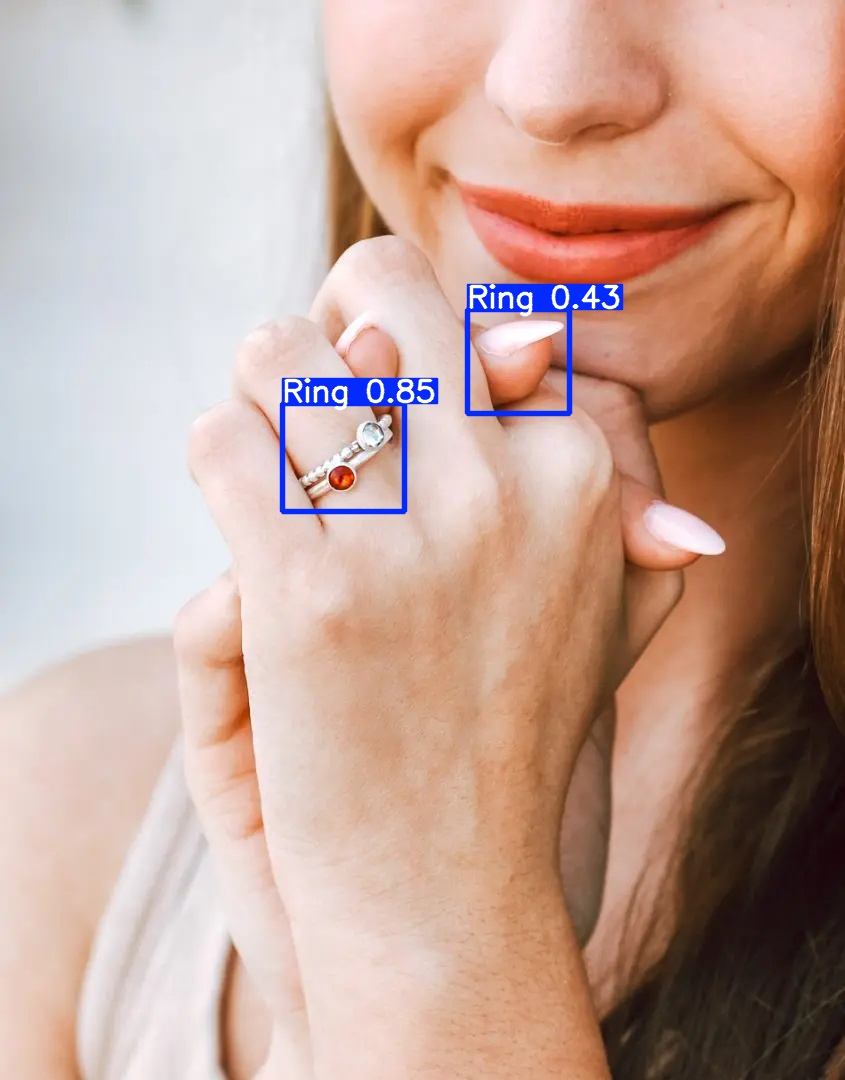

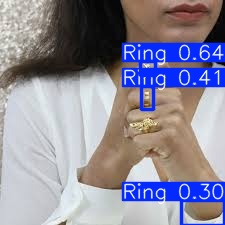

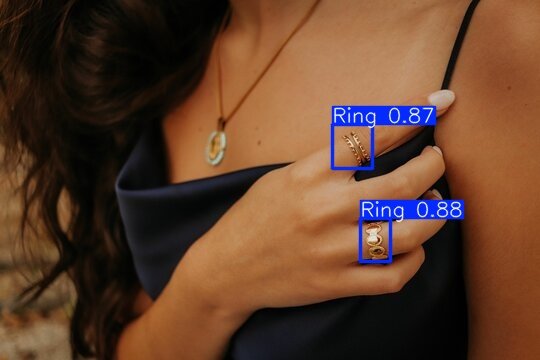

In [ ]:
from IPython.display import Image, display
import glob

print("🔼 Upload a single image to test:")
image_upload = files.upload()
image_path = list(image_upload.keys())[0]

results = model.predict(source=image_path, save=True)

predicted_images = glob.glob("runs/detect/predict/*.jpg")
print("🖼️ Prediction result:")
for img_path in predicted_images:
    display(Image(filename=img_path))
